# Task 1 - Counting the steps (confirm asymptotic growth)

To make the step counts comparable across algorithms, we count:

=> comparisons (e.g., a[i] < a[j])

=> writes/moves (assignments to the array)

In [26]:
from dataclasses import dataclass
import random
import math
import matplotlib.pyplot as plt

@dataclass
class Counter:
    comps: int = 0
    writes: int = 0

    @property
    def steps(self):
        return self.comps + self.writes


**Insertion Sort — worst-case Θ(n²)**

Worst-case input: reverse-sorted array.

In [27]:
def insertion_sort_count(a):
    c = Counter()
    a = a[:]  # copy
    for i in range(1, len(a)):
        key = a[i]; c.writes += 1
        j = i - 1
        while j >= 0:
            c.comps += 1
            if a[j] > key:
                a[j+1] = a[j]; c.writes += 1
                j -= 1
            else:
                break
        a[j+1] = key; c.writes += 1
    return c.steps


**Merge Sort — Θ(n log n)**

In [28]:
def merge_sort_count(a):
    c = Counter()
    a = a[:]

    def merge(lo, mid, hi):
        left = a[lo:mid]
        right = a[mid:hi]
        i = j = 0
        k = lo
        # merging
        while i < len(left) and j < len(right):
            c.comps += 1
            if left[i] <= right[j]:
                a[k] = left[i]; c.writes += 1
                i += 1
            else:
                a[k] = right[j]; c.writes += 1
                j += 1
            k += 1
        while i < len(left):
            a[k] = left[i]; c.writes += 1
            i += 1; k += 1
        while j < len(right):
            a[k] = right[j]; c.writes += 1
            j += 1; k += 1

    def sort(lo, hi):
        if hi - lo <= 1:
            return
        mid = (lo + hi) // 2
        sort(lo, mid)
        sort(mid, hi)
        merge(lo, mid, hi)

    sort(0, len(a))
    return c.steps


**Heap Sort — Θ(n log n)**

In [29]:
def heap_sort_count(a):
    c = Counter()
    a = a[:]
    n = len(a)

    def sift_down(i, end):
        while True:
            left = 2*i + 1
            right = 2*i + 2
            largest = i
            if left < end:
                c.comps += 1
                if a[left] > a[largest]:
                    largest = left
            if right < end:
                c.comps += 1
                if a[right] > a[largest]:
                    largest = right
            if largest == i:
                break
            a[i], a[largest] = a[largest], a[i]
            c.writes += 2
            i = largest

    # build max-heap
    for i in range(n//2 - 1, -1, -1):
        sift_down(i, n)

    # extract max repeatedly
    for end in range(n-1, 0, -1):
        a[0], a[end] = a[end], a[0]
        c.writes += 2
        sift_down(0, end)

    return c.steps


**Quick Sort — worst-case Θ(n²)**

Worst-case input depends on pivot choice. Here pivot = last element ⇒ worst-case on **already sorted** input.

In [30]:
def quick_sort_count(a):
    c = Counter()
    a = a[:]

    def partition(lo, hi):
        pivot = a[hi]; c.writes += 1
        i = lo - 1
        for j in range(lo, hi):
            c.comps += 1
            if a[j] <= pivot:
                i += 1
                a[i], a[j] = a[j], a[i]
                c.writes += 2
        a[i+1], a[hi] = a[hi], a[i+1]
        c.writes += 2
        return i + 1

    def sort(lo, hi):
        if lo >= hi:
            return
        p = partition(lo, hi)
        sort(lo, p - 1)
        sort(p + 1, hi)

    if len(a) > 0:
        sort(0, len(a) - 1)
    return c.steps


**Experiment driver + plot (steps vs n)**

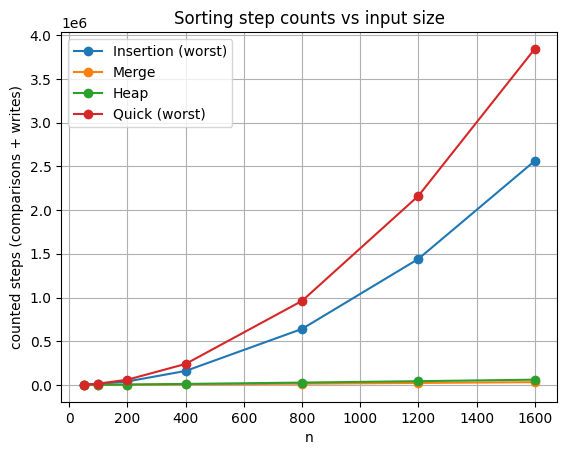

In [35]:
def gen_input(n, kind):
    if kind == "random":
        arr = list(range(n))
        random.shuffle(arr)
        return arr
    if kind == "reverse":
        return list(range(n, 0, -1))
    if kind == "sorted":
        return list(range(n))
    raise ValueError("unknown kind")

algs = {
    "Insertion (worst)": (insertion_sort_count, "reverse"),
    "Merge": (merge_sort_count, "random"),
    "Heap": (heap_sort_count, "random"),
    "Quick (worst)": (quick_sort_count, "sorted"),
}

ns = [50, 100, 200, 400, 800, 1200, 1600]

results = {name: [] for name in algs}
for n in ns:
    for name, (fn, kind) in algs.items():
        arr = gen_input(n, kind)
        results[name].append(fn(arr))

for name, ys in results.items():
    plt.plot(ns, ys, marker="o", label=name)

plt.xlabel("n")
plt.ylabel("counted steps (comparisons + writes)")
plt.title("Sorting step counts vs input size")
plt.legend()
plt.grid(True)
plt.savefig('image.png')
plt.show()
